In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['movies.dat', 'ratings.dat', 'users.dat']


In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

INITIATING CLEAR ML

In [4]:
# Add the following two lines to your code, to have ClearML automatically log your experiment
from clearml import Task
task = Task.init(project_name='My Project', task_name='My Experiment')


ClearML Task: created new task id=db0726cd224e435ea35a744f6c7e588a
2022-11-10 01:30:07,690 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/e200f9b7b3ee4eec835cf001ed460fef/experiments/db0726cd224e435ea35a744f6c7e588a/output/log


Adding the JOBLIB library so that Clear ML can utilize it's objects for improved access

In [5]:
try:
    import joblib
except ImportError:
    from sklearn.externals import joblib


**1.  Data acquisition of the movielens dataset**

In [6]:
#Data acquisition of the movies dataset
df_movie=pd.read_csv('input/movies.dat', sep = '::', engine='python', encoding='latin-1')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [7]:
#Data acquisition of the rating dataset
df_rating = pd.read_csv("input/ratings.dat",sep='::', engine='python', encoding='latin-1')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [8]:
#Data acquisition of the users dataset
df_user = pd.read_csv("input/users.dat",sep='::',engine='python', encoding='latin-1')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [9]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [45]:
len1=len(df)

TypeError: 'int' object is not callable

In [42]:
df.sample()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,age_group
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072,50-59
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117,20-29
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460,40-49
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455,20-29
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000203,NaN,NaN,NaN,6040,1091,1,956716541,NaN,NaN,NaN,NaN,NaN,NaN
1000204,NaN,NaN,NaN,6040,1094,5,956704887,NaN,NaN,NaN,NaN,NaN,NaN
1000205,NaN,NaN,NaN,6040,562,5,956704746,NaN,NaN,NaN,NaN,NaN,NaN
1000206,NaN,NaN,NaN,6040,1096,4,956715648,NaN,NaN,NaN,NaN,NaN,NaN


**2.  Perform the Exploratory Data Analysis (EDA) for the users dataset**

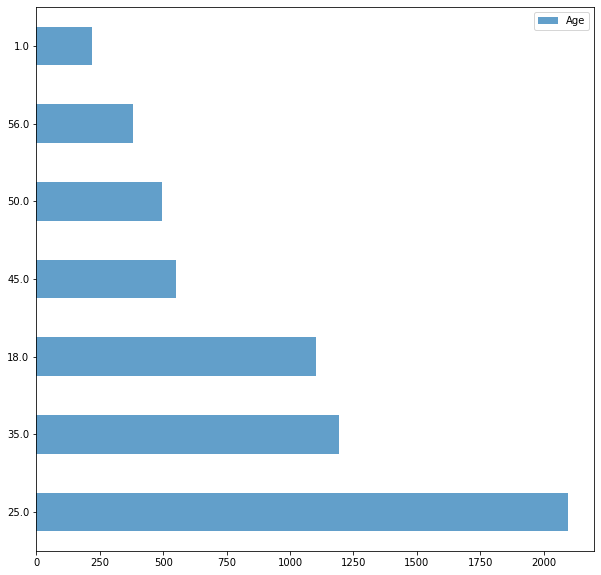

In [10]:
#Visualize user age distribution
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

Text(0.5, 0, 'Age')

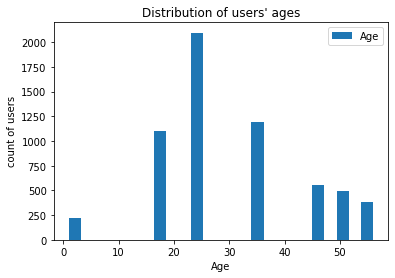

In [11]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [12]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


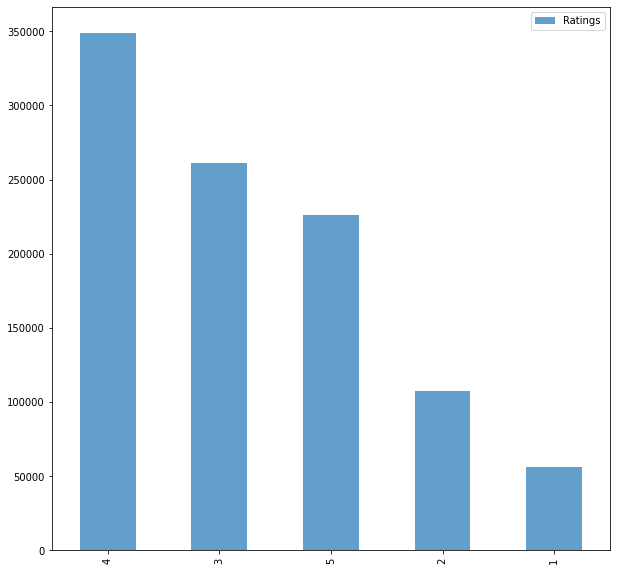

In [13]:
#Visualize overall rating by users
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [14]:
groupedby_movieName = df.groupby('MovieName')
groupedby_rating = df.groupby('Ratings')
groupedby_uid = df.groupby('UserID')
#groupedby_age = df.loc[most_50.index].groupby(['MovieName', 'age_group'])

In [15]:
movies = df.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


In [16]:
ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 13)

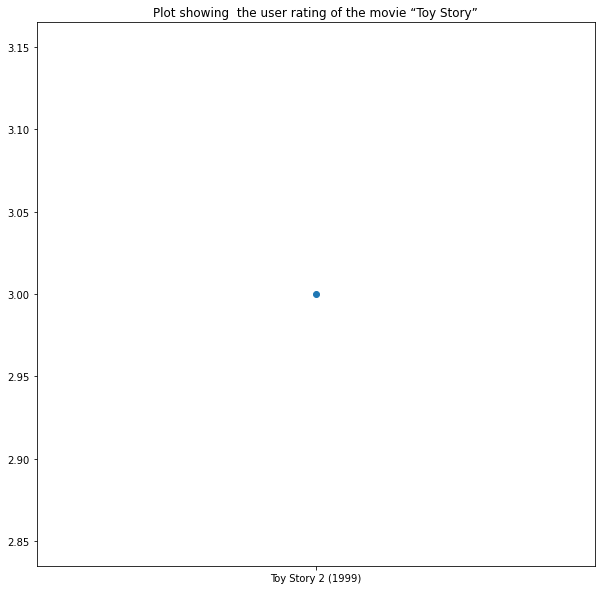

In [17]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['MovieName'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()


In [18]:
#Find and visualize the viewership of the movie “Toy Story” by age group
ToyStory_data[['MovieName','age_group']]

,MovieName,age_group
3044,Toy Story 2 (1999),0-9


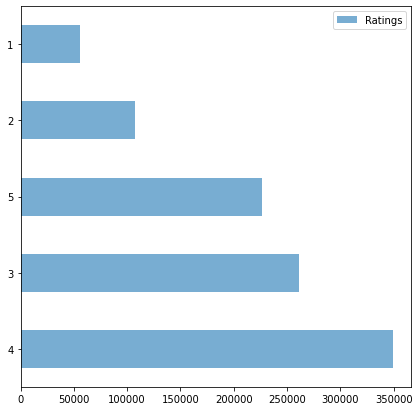

In [19]:
#Find and visualize the top 25 movies by viewership rating
top_25 = df[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

In [20]:
#Visualize the rating data by user of user id = 2696
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


**Perform machine learning on first 500 extracted records**

In [21]:
#First 500 extracted records
first_500 = df[500:]
first_500.dropna(inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_30660\2780351682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

In [23]:
#Use rating as label
labels = first_500[['Ratings']].values

In [24]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

**Perform the following: **

Text(0.5, 0, 'Ratings')

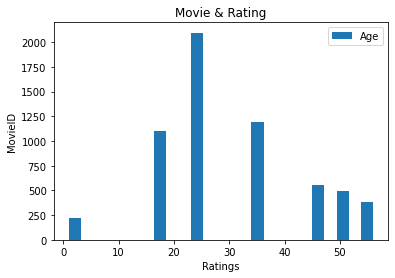

In [25]:
#Create a histogram for movie
df.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

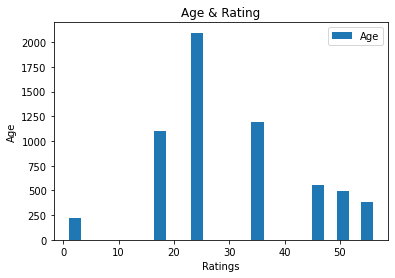

In [26]:
#Create a histogram for age
df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

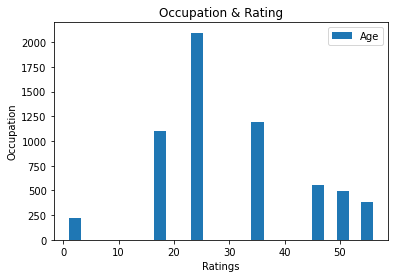

In [27]:
#Create a histogram for occupation
df.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [28]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)

joblib.dump(logreg, 'logreg.pkl', compress=True)

acc_log

C:\Users\David\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\David\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



2022-11-10 01:30:22,784 - clearml.frameworks - INFO - Found existing registered model id=9832b4402fe74d39890159e1374e65ae [c:\Users\David\Documents\GitHub\clearml\dsiga_tests\logreg.pkl] reusing it.


32.76

In [29]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
joblib.dump(svc, 'svc.pkl', compress=True)
acc_svc

C:\Users\David\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



2022-11-10 01:30:27,274 - clearml.frameworks - INFO - Found existing registered model id=fc011f3c8910450ab359c5559f53396f [c:\Users\David\Documents\GitHub\clearml\dsiga_tests\svc.pkl] reusing it.


32.94

In [30]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
joblib.dump(knn, 'knn.pkl', compress=True)
acc_knn

C:\Users\David\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



2022-11-10 01:30:30,734 - clearml.frameworks - INFO - Found existing registered model id=d29d6fdac8e04c2db6e5d5ac0f635127 [c:\Users\David\Documents\GitHub\clearml\dsiga_tests\knn.pkl] reusing it.


57.31

In [31]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
joblib.dump(gaussian, 'gaussian.pkl', compress=True)
acc_gaussian

C:\Users\David\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



2022-11-10 01:30:34,731 - clearml.frameworks - INFO - Found existing registered model id=95941f5b7941480a89ed14cfe62a6f81 [c:\Users\David\Documents\GitHub\clearml\dsiga_tests\gaussian.pkl] reusing it.


32.23

In [32]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
joblib.dump(perceptron, 'perceptron.pkl', compress=True)
acc_perceptron

C:\Users\David\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



2022-11-10 01:30:37,836 - clearml.frameworks - INFO - Found existing registered model id=47394a7eb3b04bf1be377e604f2d402b [c:\Users\David\Documents\GitHub\clearml\dsiga_tests\perceptron.pkl] reusing it.


28.61

In [33]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
joblib.dump(linear_svc, 'linear_svc.pkl', compress=True)
acc_linear_svc

C:\Users\David\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\David\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



2022-11-10 01:30:41,390 - clearml.frameworks - INFO - Found existing registered model id=7dc5769b6ac24ea29ccbf5d69bb770c9 [c:\Users\David\Documents\GitHub\clearml\dsiga_tests\linear_svc.pkl] reusing it.


32.94

In [34]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
joblib.dump(decision_tree, 'decision_tree.pkl', compress=True)
acc_decision_tree

2022-11-10 01:30:44,633 - clearml.frameworks - INFO - Found existing registered model id=cca7063f854a4168859dad63fa18f115 [c:\Users\David\Documents\GitHub\clearml\dsiga_tests\decision_tree.pkl] reusing it.


98.54

In [35]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
joblib.dump(random_forest, 'random_forest.pkl', compress=True)
acc_random_forest

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_30660\689254912.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



2022-11-10 01:30:52,127 - clearml.frameworks - INFO - Found existing registered model id=bbabdfca132c4edf8d04cbe2650e0d8f [c:\Users\David\Documents\GitHub\clearml\dsiga_tests\random_forest.pkl] reusing it.


98.54

In [36]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
               'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.54
7,Decision Tree,98.54
1,KNN,57.31
0,Support Vector Machines,32.94
6,Linear SVC,32.94
2,Logistic Regression,32.76
4,Naive Bayes,32.23
5,Perceptron,28.61


In [37]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    # print("TRAINING SCORES",train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt,train_scores_mean,test_scores_mean,fit_times_mean


In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from clearml import Task

In [39]:
# # Random Forest
# # 
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(train, train_labels)
# Y_pred = random_forest.predict(test)
# random_forest.score(train, train_labels)
# acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
# joblib.dump(random_forest, 'random_forest.pkl', compress=True)
# acc_random_forest

In [40]:
# Task.init('My Project', 'My Experiment')

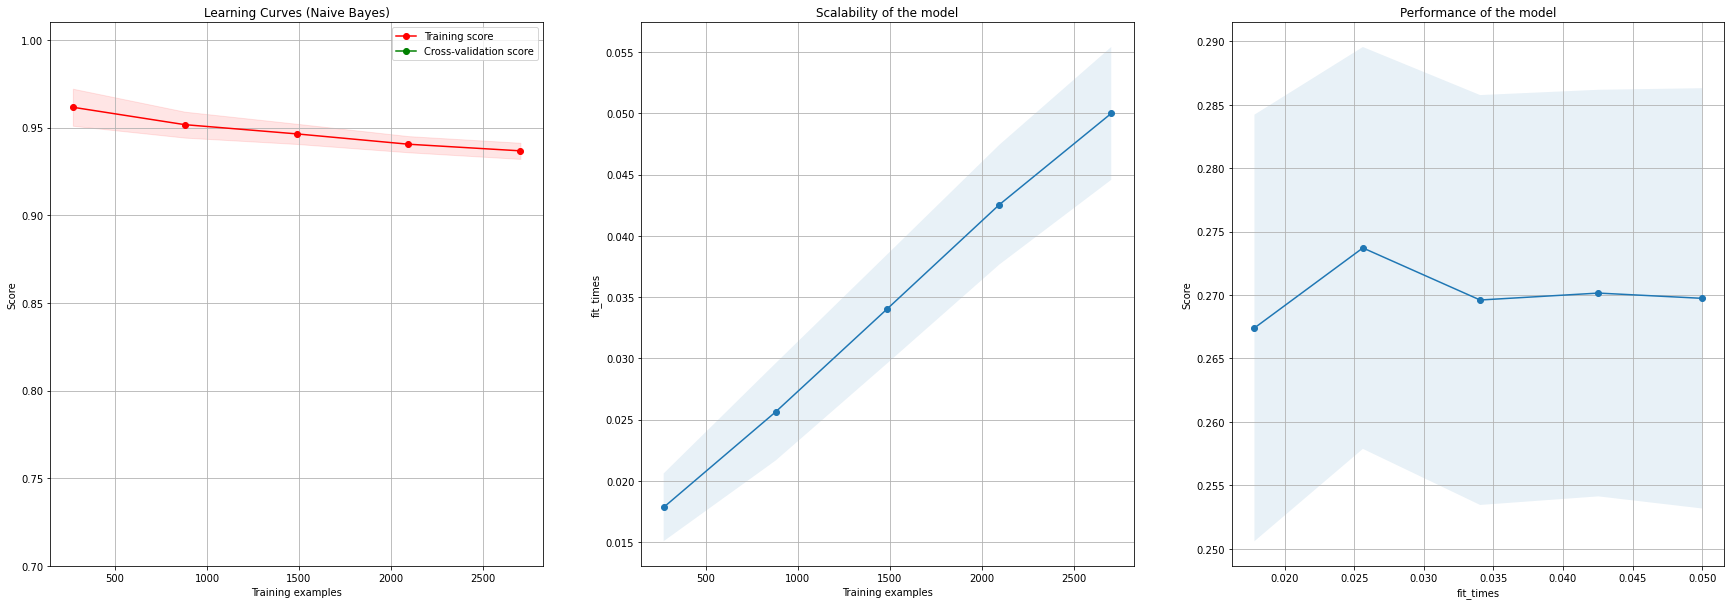

[0.96155556 0.95162685 0.94637525 0.94047233 0.93669131] [0.2674003  0.27370753 0.26960118 0.27014771 0.26973412] [0.01783215 0.02562032 0.03404496 0.04253989 0.04999291]


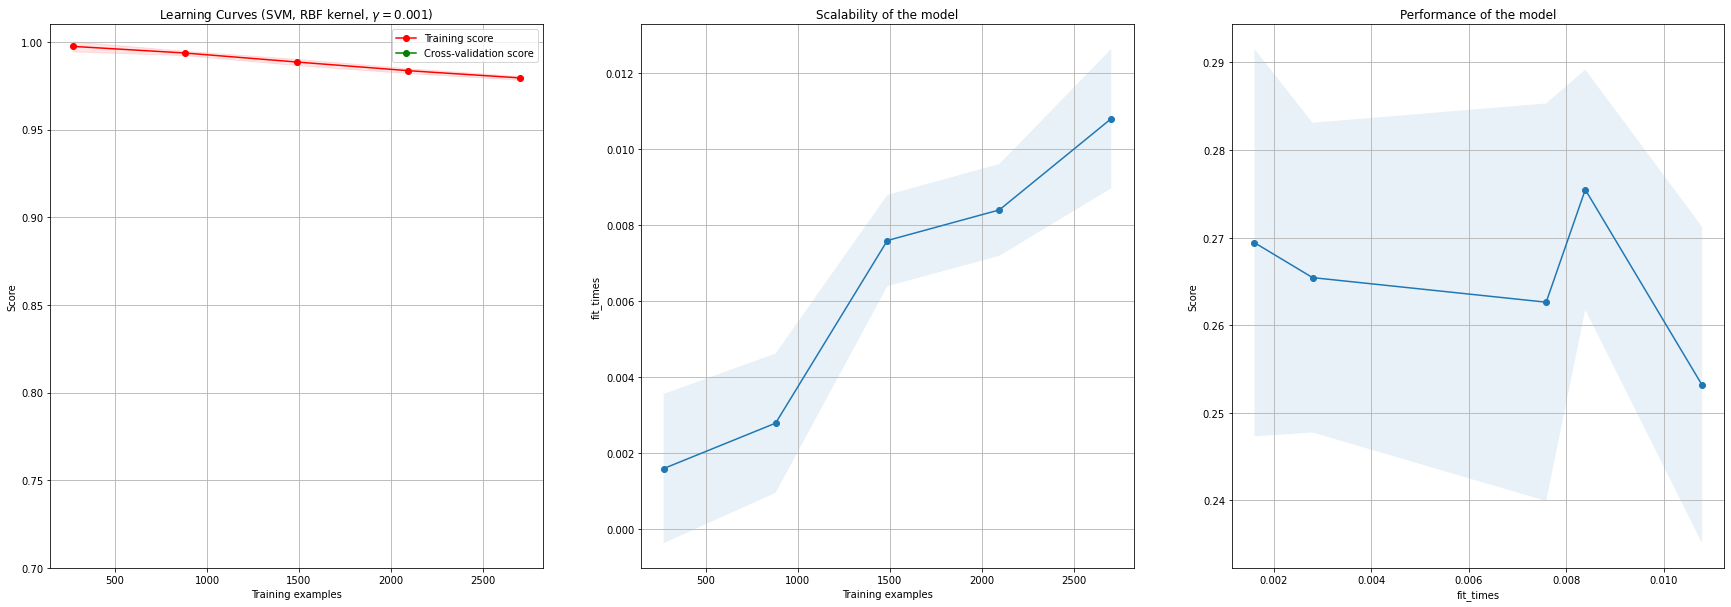

done


ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


In [41]:
from clearml import Task, Logger

# Connecting ClearML with the current process,
# from here on everything is logged automatically


Task.current_task()

logger_model1 = task.get_logger
# logger_model2 = task.get_logger
fig, fig_axes = plt.subplots(1, 3, figsize=(30, 10))

#Create train and test data set
# train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

X, y =features, labels
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=10)

plt,a,b,c=plot_learning_curve(estimator, title, X, y, axes=fig_axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()
print(a,b,c)
epoch=1
Logger.current_logger().report_scalar(title='Scalar example {} - epoch'.format(epoch), 
            series='train_scores_mean', value=a.mean(), iteration=epoch)
Logger.current_logger().report_scalar(title='Scalar example {} - epoch'.format(epoch), 
            series='test_scores_mean', value=b.mean(), iteration=epoch)
Logger.current_logger().report_scalar(title='Scalar example {} - epoch'.format(epoch), 
            series='fit_times_mean', value=c.mean(), iteration=epoch)
            
fig, fig_axes = plt.subplots(1, 3, figsize=(30, 10))

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator =  DecisionTreeClassifier()

plt,a,b,c=plot_learning_curve(estimator, title, X, y,axes=fig_axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

epoch=1
Logger.current_logger().report_scalar(title='Scalar example {} - epoch'.format(epoch), 
            series='train_scores_mean', value=a.mean(), iteration=epoch)
Logger.current_logger().report_scalar(title='Scalar example {} - epoch'.format(epoch), 
            series='test_scores_mean', value=b.mean(), iteration=epoch)
Logger.current_logger().report_scalar(title='Scalar example {} - epoch'.format(epoch), 
            series='fit_times_mean', value=c.mean(), iteration=epoch)

print('done')